# Compute the label distribution based on the volumes of the Voronoi-Cells

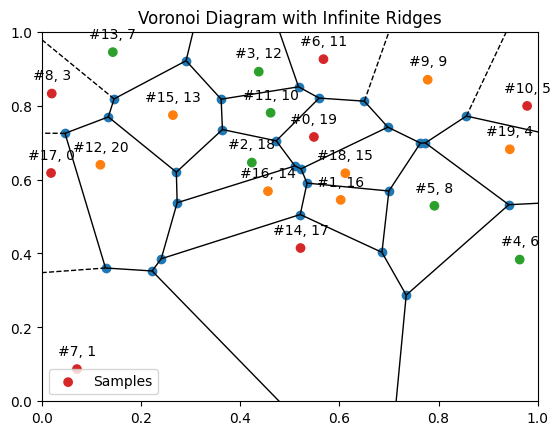

In [1]:
# Import necessary libraries
import sys
sys.path.extend(["../../"])
from src.para_voro import *
from src.para_voro_plots import *

n_points = 20
n_labels = 3

# Create a sample dataset with 10 samples
np.random.seed(0)
samples = np.random.rand(n_points, 2)
labels = np.random.randint(1, n_labels + 1, size=(n_points, ))

color_palette = np.array(sns.color_palette().as_hex())

# Build the Voronoi diagram
vor = Voronoi(samples)

identify_infinity_regions_and_neighbors_results = identify_infinity_regions_and_neighbors(vor)
[point_idx_region_mapping, _, _, _, _] = identify_infinity_regions_and_neighbors_results

# Plot the Voronoi diagram including infinite ridges
plt.close()
fig = voronoi_plot_2d(vor, show_points=False)
plt.scatter(samples[:, 0], samples[:, 1], c=color_palette[labels], label='Samples')
for point_idx, point in enumerate(samples):
    region_idx = point_idx_region_mapping[point_idx]
    plt.annotate(f"#{point_idx}, {region_idx}", xy=point, textcoords='offset points', xytext=(0,10), ha='center')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.title('Voronoi Diagram with Infinite Ridges')
plt.show()


In [2]:
make_halfspaces(130, 312, 4, 2)

(array([  0.,   0.,  -1.,   0., 130.]),
 array([   0.,    0.,    1.,    0., -312.]))

In [3]:
bandwidths = np.array([0.01, 0.01])
aabbox = np.array([
    [0.0, 1.0],
    [0.0, 1.0]
])
cch = True

In [4]:
D_i_s, sample_points, sample_points_min, sample_points_max = compute_label_distribution(samples, labels, bandwidths, aabbox, clip_convex_hull=cch, verbose=True)

compute voronoi for 20 samples in dimensionality 2...
compute sample points...
skipping region with idx 2 as it does not map to a point


In [5]:
D_i_s_normed = normalize_label_distribution(D_i_s)

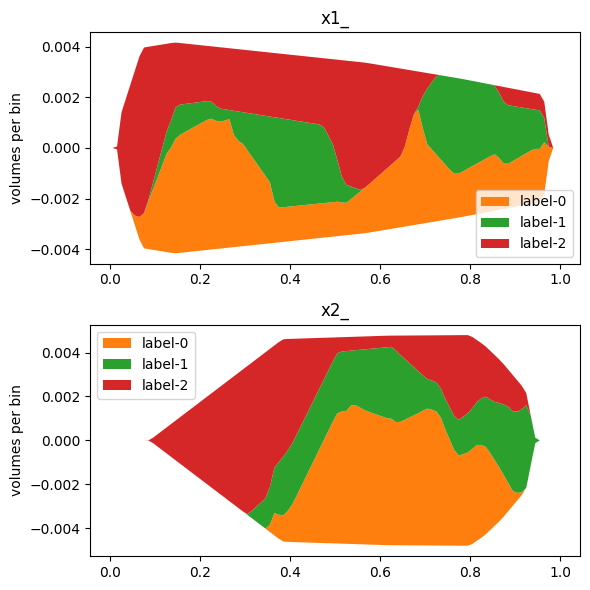

In [6]:
plot_label_distribution_matrix_list(sample_points, D_i_s, dim_labels=["x1_", "x2_"], line_labels=[f"label-{i}" for i in range(n_labels)],
                                    stack_plot_kwargs=dict(baseline='sym', colors=sns.color_palette().as_hex()[1:]))

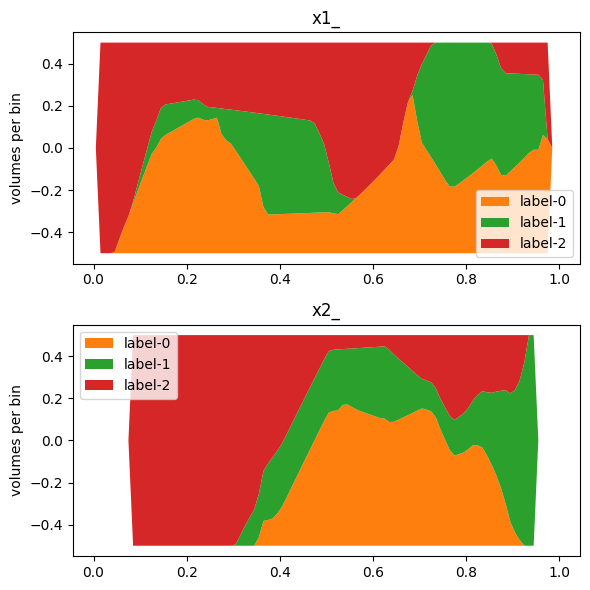

In [7]:
plot_label_distribution_matrix_list(sample_points, D_i_s_normed, dim_labels=["x1_", "x2_"], line_labels=[f"label-{i}" for i in range(n_labels)],
                                    stack_plot_kwargs=dict(baseline='sym', colors=sns.color_palette().as_hex()[1:]))